In [26]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator
%matplotlib inline

In [27]:
np.random.seed(1024)

In [28]:
def model_train(X, Y, alpha, num_iter, reg=False):
    m = Y.shape[0]
    Theta = np.random.randn(X.shape[1], 1)
    if reg:
        for i in range(num_iter):
            Theta = Theta - alpha/m * np.dot(X.T, (np.dot(X, Theta) - y))
    else:
        for i in range(num_iter):
            Theta = Theta - alpha/m * np.dot(X.T, (np.dot(X, Theta) - y))
    return Theta

In [137]:
x = np.arange(-0.7, 3.5, 0.15)
x = np.reshape(x, (len(x), 1))
y_clean = np.sin(x) + 2
noise = np.random.normal(scale=0.3, size=y_clean.shape)
y = y_clean + noise

In [183]:
x_test = np.arange(-0.6, 3.4, 0.01)
x_test = np.reshape(x_test, (len(x_test), 1))

In [184]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
print(model.intercept_, model.coef_)

[2.14632759] [[0.12972436]]


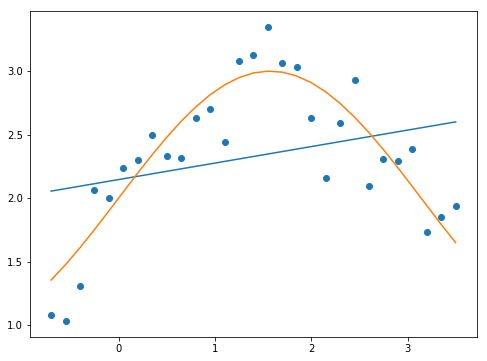

In [185]:
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.plot(x, y_clean)

In [186]:
X = np.concatenate((np.ones((x.shape)), x), axis=1)
for degree in range(2, 20):
    X = np.concatenate((X, np.power(x, degree)), axis=1)

In [187]:
X_test = np.concatenate((np.ones((x_test.shape)), x_test), axis=1)
for degree in range(2, 20):
    X_test = np.concatenate((X_test, np.power(x_test, degree)), axis=1)

In [188]:
Y = y.reshape((len(y),))

In [189]:
model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X_test)

In [219]:
lmbd_r = 30
model = Ridge(alpha=lmbd_r)
model.fit(X, Y)
y_pred_ridge = model.predict(X_test)

C:\Users\Aleks_Iv\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.12388e-20): result may not be accurate.
  overwrite_a=True).T


In [220]:
lmbd_l = 0.01
model = Lasso(alpha=lmbd_l, max_iter=1000000)
model.fit(X, Y)
y_pred_lasso = model.predict(X_test)

C:\Users\Aleks_Iv\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5, 1.0, 'Without LASSO regularization, $\\lambda$ = 0.01')

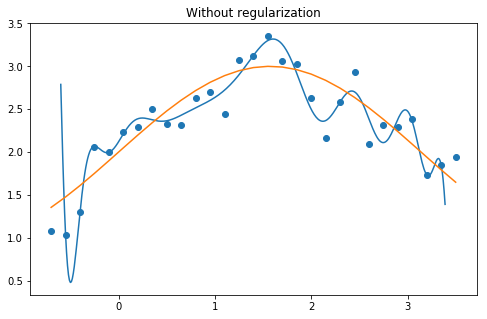

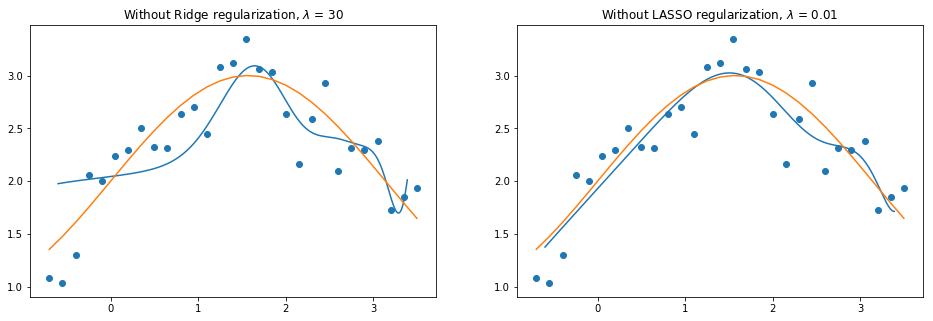

In [225]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.plot(x_test, y_pred)
plt.plot(x, y_clean)
plt.title('Without regularization')

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x_test, y_pred_ridge)
plt.plot(x, y_clean)
plt.title('Without Ridge regularization, ' + r'$\lambda$ = ' + str(lmbd_r))

plt.subplot(1, 2, 2)
plt.scatter(x, y)
plt.plot(x_test, y_pred_lasso)
plt.plot(x, y_clean)
plt.title('Without LASSO regularization, ' + r'$\lambda$ = ' + str(lmbd_l))